# 1. Фруктовая Метрика (5)

In [ ]:
import numpy as np
import pandas as pd

# Данные
data = {
    "probability": [0.85, 0.55, 0.65, 0.40, 0.95, 0.75, 0.50, 0.60, 0.30, 0.80],
    "label": ["Спелый", "Спелый", "Неспелый", "Спелый", "Спелый", "Неспелый", "Спелый", "Спелый", "Неспелый", "Спелый"]
}

df = pd.DataFrame(data)
df['label'] = df['label'].map({"Спелый": 1, "Неспелый": 0})  # Переводим метки в бинарные значения

# Пороги
# thresholds = np.arange(0.0, 1.1, 0.1)
# numpy немного портит числа (0.3 -> 0.3000000000000000004)
thresholds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Вычисление AP
precision_values = []

for t in thresholds:
    predictions = (df['probability'] >= t).astype(int)
    # print("t= ", t)
    # print(predictions)
    tp = ((predictions == 1) & (df['label'] == 1)).sum()  # Истинные положительные
    fp = ((predictions == 1) & (df['label'] == 0)).sum()  # Ложные положительные
    # print("TP = ", tp, "FP = ",fp)

    if tp + fp > 0:
        precision = tp / (tp + fp)
    else:
        precision = 0.0

    precision_values.append(precision)

# Average Precision
average_precision = np.mean(precision_values)
print(f"Average Precision = {average_precision:.2f}")


Average Precision = 0.77


# 2. Разделяющий эллипс (5)

In [ ]:
import numpy as np

# Заданные параметры
mu1 = np.array([-2, 3])
mu2 = np.array([1, 0])

Sigma1 = np.array([[2, 0],
                   [0, 1]])
Sigma2 = np.array([[3, -1],
                   [-1, 4]])

# Вычисление обратных матриц ковариации
Sigma1_inv = np.linalg.inv(Sigma1)
Sigma2_inv = np.linalg.inv(Sigma2)
# print(Sigma1_inv)
# print(Sigma2_inv)

# Матрица A
A = Sigma1_inv - Sigma2_inv
# print(A)
# Найдём собственные значения матрицы A
eigvals, _ = np.linalg.eig(A)
# print(eigvals)
# Длина большой полуоси
major_axis_length = np.sqrt(1 / min(eigvals))

# Округление до ближайшего целого
result = round(major_axis_length)
print("Длина большой полуоси разделяющего эллипса :", result)


Длина большой полуоси разделяющего эллипса : 3


# 3. Двойное блуждание по числовой прямой (5)

Марковский процесс для разницы координат друзей, которая менается на -2 0 +2

In [ ]:
import random

def simulate_meeting(max_time, initial_distance, num_simulations):
    success_count = 0

    for _ in range(num_simulations):
        distance = initial_distance
        for _ in range(max_time):
            step = random.choices([-2, 0, 2], weights=[0.25, 0.5, 0.25])[0]
            distance = max(0, distance + step)  # отражение от 0
            if distance == 0:  # встреча
                success_count += 1
                break

    return success_count / num_simulations

# Параметры задачи
max_time = 100
initial_distance = 10
num_simulations = 1000000  # количество экспериментов

probability = simulate_meeting(max_time, initial_distance, num_simulations)
print(f"{probability:.3f}")


0.480


# 4. Минимизация MSE (5) [тетрадь]

# 5. Комбинации для геймера (5)

In [ ]:
N = 100
k = 64

for m in range(100):
    if (k-m) + 2*(m) == 100:
        print("ответ:", (6)*(k-m) + (7)*m*2)
        print((k-m), m)
        break



672
28 36


In [ ]:
4608/36


128.0

# 7. Восстановить ядро свертки (7)

In [ ]:
import numpy as np

def solve_convolution_kernel(m, n, image, h, w, result):
    pad_h = (h - 1) // 2
    pad_w = (w - 1) // 2

    kernel = np.zeros((h * w,), dtype=int)

    kernel_index = [(i, j) for i in range(h) for j in range(w)]

    equations = []
    results = []

    for i in range(m):
        for j in range(n):
            eq = np.zeros(h * w, dtype=int)

            for di in range(h):
                for dj in range(w):
                    image_i = i + di - pad_h
                    image_j = j + dj - pad_w
                    if 0 <= image_i < m and 0 <= image_j < n:
                        idx = kernel_index.index((di, dj))
                        eq[idx] = image[image_i][image_j]

            equations.append(eq)
            results.append(result[i][j])

    A = np.array(equations, dtype=int)
    b = np.array(results, dtype=int)
    kernel_values = np.linalg.lstsq(A, b, rcond=None)[0]
    kernel_values = np.round(kernel_values).astype(int)

    kernel = kernel_values.reshape(h, w)
    kernel = np.flip(kernel, axis=(0, 1))
    return kernel

m, n = map(int, input().split(','))
image = [list(map(int, input().split(','))) for _ in range(m)]
h, w = map(int, input().split(','))
result = [list(map(int, input().split(','))) for _ in range(m)]

kernel = solve_convolution_kernel(m, n, image, h, w, result)

for row in kernel:
    print(','.join(map(str, row)))


3,5
9,0,46,57,49
19,23,41,23,88
47,71,92,8,86
3,3
256,1096,1586,2501,1300
1135,1014,1028,2221,1341
1465,2149,1830,936,1860
-10,12,-15
11,11,15
2,1,6


# 8. Обходы графа (7)

In [ ]:
MOD = 1000000007

def matrix_mult(A, B, mod=MOD):
    """Умножение двух матриц с модулем."""
    n = len(A)
    result = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            for k in range(n):
                result[i][j] = (result[i][j] + A[i][k] * B[k][j]) % mod
    return result

def matrix_pow(A, k, mod=MOD):
    """Быстрое возведение матрицы A в степень k."""
    n = len(A)
    # Единичная матрица
    result = [[1 if i == j else 0 for j in range(n)] for i in range(n)]
    base = A
    while k > 0:
        if k % 2 == 1:
            result = matrix_mult(result, base, mod)
        base = matrix_mult(base, base, mod)
        k //= 2
    return result

# Чтение входных данных
n, k = map(int, input().split())
adj_matrix = [list(map(int, input().split())) for _ in range(n)]

# Возведение матрицы в степень
result_matrix = matrix_pow(adj_matrix, k)

# Ответ — элемент (0, 0) в матрице (считаем, что индексация с 0)
print(result_matrix[0][0])


In [ ]:
import numpy as np

MOD = 10**9 + 7

# Функция для модульного обратного числа
def mod_inverse(a, mod):
    return pow(a, mod - 2, mod)

# Основной алгоритм
def solve():
    # Считывание количества состояний
    n = int(input())

    # Построение графа и считывание рёбер
    graph = [[] for _ in range(n + 1)]
    flow = [[] for _ in range(n + 1)]
    out_degree = [0] * (n + 1)
    is_sink = [True] * (n + 1)

    for s in range(1, n + 1):
        line = list(map(int, input().split()))
        k = line[0]
        if k > 0:
            is_sink[s] = False  # Не сток
        for i in range(k):
            to, f = line[1 + 2 * i], line[2 + 2 * i]
            graph[to].append(s)
            flow[to].append(f)
            out_degree[s] += 1

    # Определение стоков
    sinks = [i for i in range(1, n + 1) if is_sink[i]]

    # Динамика для подсчёта вероятностей
    dp = np.zeros(n + 1, dtype=np.int64)
    dp[1] = 1  # Вероятность в начальном состоянии

    # Обратный топологический порядок
    order = []
    queue = [1]
    while queue:
        current = queue.pop()
        order.append(current)
        for next_state in graph[current]:
            out_degree[next_state] -= 1
            if out_degree[next_state] == 0:
                queue.append(next_state)

    # Пересчитываем вероятности в обратном порядке
    for current in reversed(order):
        total_flow = sum(flow[current])
        if total_flow > 0:
            inv_total_flow = mod_inverse(total_flow, MOD)
            for i, prev in enumerate(graph[current]):
                dp[prev] = (dp[prev] + dp[current] * flow[current][i] * inv_total_flow) % MOD

    # Формирование ответа для стоков
    result = []
    for sink in sinks:
        result.append((sink, dp[sink]))

    result.sort()
    for x, prob in result:
        print(x, prob)

# Запуск решения
solve()


IndexError: list index out of range

# 11. Предсказание победителя в компьютерной игре (10)


## imports/prepare

In [ ]:
# !pip install catboost
# !pip install lightgbm==3.2.1

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from catboost import CatBoostClassifier, Pool
import lightgbm as lgb

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

data.drop_duplicates(inplace=True)

In [ ]:
continuos = ["roundNum", "ctScore", "tScore", "ctFreezeTimeEndEqVal", "ctRoundStartEqVal", "tFreezeTimeEndEqVal", "tRoundStartEqVal"]
cat_features=["mapName", "ctTeam", "tTeam", "ctBuyType", "tBuyType"]

In [ ]:
# data.info()

In [ ]:
# data.describe()

In [ ]:
for col in cat_features:
    print(data[col].nunique() == test[col].nunique() )

True
False
False
True
True


In [ ]:
not_in_train_ctTeam = []
not_in_test_ctTeam = []

col = "ctTeam"
for value in test[col].unique():
    if value not in data[col].unique():
        not_in_train_ctTeam.append(value)

for value in data[col].unique():
    if value not in test[col].unique():
        not_in_test_ctTeam.append(value)


print(not_in_train_ctTeam)
print(not_in_test_ctTeam)

not_in_train_tTeam = []
not_in_test_tTeam = []

col = "tTeam"
for value in test[col].unique():
    if value not in data[col].unique():
        not_in_train_tTeam.append(value)

for value in data[col].unique():
    if value not in test[col].unique():
        not_in_test_tTeam.append(value)

print(not_in_train_tTeam)
print(not_in_test_tTeam)

['EYEBALLERS']
['ENCE', '100TAG', 'Hype E-Sports']
[]
['MOUZ', 'Let us cook', 'EYEBALLERS', 'paiN Academy', 'ENCE Academy']


In [ ]:
add_to_train = test[test["ctTeam"]=="EYEBALLERS"]
add_to_train.drop_duplicates(inplace=True)
add_to_train["winnerSide"] = 0
add_to_train

<ipython-input-487-da1099545362>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add_to_train.drop_duplicates(inplace=True)
<ipython-input-487-da1099545362>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add_to_train["winnerSide"] = 0


,mapName,roundNum,ctScore,tScore,ctTeam,tTeam,ctFreezeTimeEndEqVal,ctRoundStartEqVal,ctBuyType,tFreezeTimeEndEqVal,tRoundStartEqVal,tBuyType,winnerSide
2123,de_anubis,24,11,12,EYEBALLERS,LDLC OL,29850,1000,Full Buy,30150,24750,Full Buy,0


In [ ]:
print(data.shape)

data_r = data[~data["ctTeam"].isin(not_in_test_ctTeam)]
data_r = data_r[~data_r["tTeam"].isin(not_in_test_tTeam)]
data_r = pd.concat([data_r, add_to_train], ignore_index=True).reset_index(drop=True)

print(data_r.shape)

(9008, 13)
(8999, 13)


In [ ]:
def prepare_for_lgbm(df):
    enc = OneHotEncoder(sparse_output=False)

    categorical = ["mapName", "ctTeam", "tTeam", "ctBuyType", "tBuyType"]
    enc_fea = enc.fit_transform(df[categorical])
    encoded_df = pd.DataFrame(enc_fea, columns=enc.get_feature_names_out(categorical))
    return pd.concat([df.drop(categorical, axis=1), encoded_df], axis=1)

In [ ]:
df_simple = prepare_for_lgbm(data_r.copy())

X = df_simple.drop("winnerSide", axis=1)
y = df_simple["winnerSide"]
print(X.shape, y.shape)

(8999, 367) (8999,)


In [ ]:
X_w_cat = data_r.drop("winnerSide", axis=1)
y_w_cat = data_r["winnerSide"]
print(X_w_cat.shape, y_w_cat.shape)

(8999, 12) (8999,)


In [ ]:
X_test = prepare_for_lgbm(test.copy())
print(X_test.shape)

(3750, 367)


In [ ]:
X_test_w_cat = test.copy()
print(X_test_w_cat.shape)

(3750, 12)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train[continuos] = scaler.fit_transform(X_train[continuos])
X_val[continuos] = scaler.transform(X_val[continuos])

## Fitting

### lgbm

In [ ]:
%%time
lgbm = lgb.LGBMClassifier(objective="binary", random_state=42)

param_grid = {
    "min_child_samples": np.arange(13, 20),
    "max_depth": np.arange(3, 6),
    'n_estimators': [450, 300, 250],
}

search = GridSearchCV(lgbm, param_grid, cv=5, scoring="accuracy").fit(X_train, y_train)

# Вывод результатов
print("Лучшие параметры:", search.best_params_)
print("Лучшее значение точности:", search.best_score_)

# Оценка на валидационной выборке
best_pipeline = search.best_estimator_
val_accuracy = best_pipeline.score(X_val, y_val)
print("Точность на валидационной выборке:", val_accuracy)

Лучшие параметры: {'max_depth': 3, 'min_child_samples': 15, 'n_estimators': 300}
Лучшее значение точности: 0.6484222260829279
Точность на валидационной выборке: 0.6433333333333333
CPU times: user 3min 47s, sys: 1.79 s, total: 3min 49s
Wall time: 2min 33s


In [ ]:
scaler = StandardScaler()
X[continuos] = scaler.fit_transform(X[continuos])
X_test[continuos] = scaler.transform(X_test[continuos])

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
      winnerSide
0              1
1              0
2              0
3              1
4              0
...          ...
3745           1
3746           0
3747           1
3748           1
3749           0

[3750 rows x 1 columns]


<Axes: xlabel='winnerSide', ylabel='Density'>

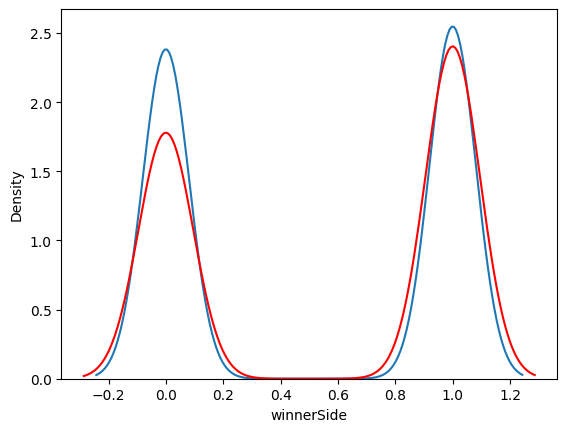

In [ ]:
lgbm = lgb.LGBMClassifier(
    objective="binary",
    min_data_in_leaf = 15,
    max_depth = 3,
    n_estimators = 300,
    random_state=42
).fit(X, y)


pred_lgbm = lgbm.predict(X_test)
submission = pd.read_csv('SampleSubmission.csv')
submission['winnerSide'] = pred_lgbm # ваше предсказание
submission.to_csv('submission_hw3_lgbm.csv', index=False)
print(submission)

sns.kdeplot(y)
sns.kdeplot(pred_lgbm, color="r")

-------- AdversarialValidation --------

In [ ]:
from sklearn.metrics import roc_auc_score
#2
X_av = X.copy() #сохраним базовый train
X_test_av = X_test.copy() #сохраним базовый test

X_av["is_test"] = 0
X_test_av["is_test"]  = 1
all = pd.concat([X_av, X_test_av], axis=0, ignore_index=True)

#new train and target
X_all = all.drop(['is_test'], axis=1)
y_all = all['is_test']

#fitting
lgbm_AV = lgb.LGBMClassifier(
    objective="binary",
    min_data_in_leaf = 15,
    max_depth = 3,
    n_estimators = 300,
    random_state=42
).fit(X_all, y_all)


auc_score = roc_auc_score(y_all, lgbm_AV.predict_proba(X_all)[:,1])
print(auc_score, "если больше 0.5, то шансы есть; вроде норм")

#predict proba
X_new = X_all.copy()
X_new['proba'] = lgbm_AV.predict_proba(X_all)[:,1]
X_new['is_test'] = y_all

# оставляем только обучающую
X_new = X_new[X_new['is_test']==0]

#sorting
nrows = X_new.shape[0]

sorted = X_new.sort_values(by='proba',ascending=False)

#выделяем 10 % на валидацию
ind = sorted[:int(nrows*.1)].index
ind2 = sorted[int(nrows*.1):].index

X_valid_av = X.iloc[ind]
y_valid_av = y.iloc[ind]
X_train_av = X.iloc[ind2]
y_train_av = y.iloc[ind2]

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
0.6516430714523835 если больше 0.5, то шансы есть; вроде норм


In [ ]:
%%time
lgbm = lgb.LGBMClassifier(objective="binary", random_state=42)

param_grid = {
    "min_child_samples": np.arange(13, 17),
    "max_depth": np.arange(3, 4),
    'n_estimators': [450, 300, 250],
}

search = GridSearchCV(lgbm, param_grid, cv=5, scoring="accuracy").fit(X_train_av, y_train_av)

# Вывод результатов
print("Лучшие параметры:", search.best_params_)
print("Лучшее значение точности:", search.best_score_)

# Оценка на валидационной выборке
best_pipeline = search.best_estimator_
val_accuracy = best_pipeline.score(X_valid_av, y_valid_av)
print("Точность на валидационной выборке:", val_accuracy)

KeyboardInterrupt: 

[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
      winnerSide
0              1
1              0
2              0
3              1
4              0
...          ...
3745           1
3746           0
3747           1
3748           1
3749           0

[3750 rows x 1 columns]


<Axes: xlabel='winnerSide', ylabel='Density'>

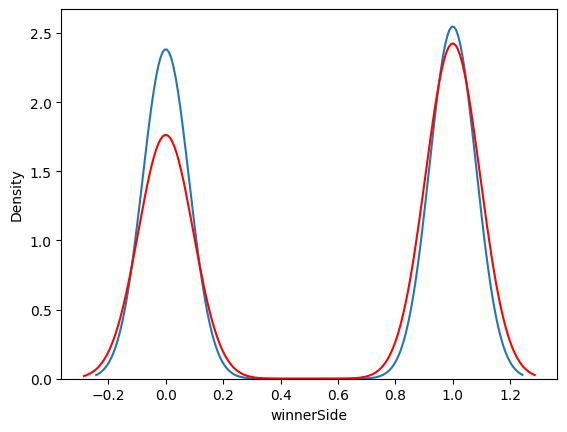

In [ ]:
lgbm = lgb.LGBMClassifier(
    objective="binary",
    min_data_in_leaf = 13,
    max_depth = 3,
    n_estimators = 250,

    random_state=42
).fit(X, y)


pred_lgbm = lgbm.predict(X_test)
submission = pd.read_csv('SampleSubmission.csv')
submission['winnerSide'] = pred_lgbm # ваше предсказание
submission.to_csv('submission_hw3_lgbm_av.csv', index=False)
print(submission)

sns.kdeplot(y)
sns.kdeplot(pred_lgbm, color="r")

### CatBoost

In [ ]:
model = CatBoostClassifier(
    iterations=12000,
    learning_rate=0.05,
    depth=5,
    loss_function="Logloss",
    eval_metric="Accuracy",
    random_seed=42,
    verbose=100,
    cat_features=cat_features,
    use_best_model=True
)
model_av = CatBoostClassifier(
    iterations=12000,
    learning_rate=0.05,
    depth=5,
    loss_function="Logloss",
    eval_metric="Accuracy",
    random_seed=42,
    verbose=100,
    cat_features=cat_features,
)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_w_cat, y_w_cat, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train[continuos] = scaler.fit_transform(X_train[continuos])
X_val[continuos] = scaler.transform(X_val[continuos])

In [ ]:
from sklearn.metrics import roc_auc_score
#2
X_av = X_w_cat.copy() #сохраним базовый train
X_test_av = X_test_w_cat.copy() #сохраним базовый test

X_av["is_test"] = 0
X_test_av["is_test"]  = 1
all = pd.concat([X_av, X_test_av], axis=0, ignore_index=True)

#new train and target
X_all = all.drop(['is_test'], axis=1)
y_all = all['is_test']
print(X_all.shape)

#fitting
model_av.fit(X_all, y_all, logging_level='Silent')


auc_score = roc_auc_score(y_all, model_av.predict_proba(X_all)[:,1])
print(auc_score, "если больше 0.5, то шансы есть; вроде норм")

#predict proba
X_new = X_all.copy()
X_new['proba'] = model_av.predict_proba(X_all)[:,1]
X_new['is_test'] = y_all

# оставляем только обучающую
X_new = X_new[X_new['is_test']==0]

#sorting
nrows = X_new.shape[0]

sorted = X_new.sort_values(by='proba',ascending=False)

#выделяем 10 % на валидацию
ind = sorted[:int(nrows*.1)].index
ind2 = sorted[int(nrows*.1):].index

X_valid_av = X_w_cat.iloc[ind]
y_valid_av = y_w_cat.iloc[ind]
X_train_av = X_w_cat.iloc[ind2]
y_train_av = y_w_cat.iloc[ind2]

(12749, 12)
0.3909128866170315 если больше 0.5, то шансы есть; вроде норм


In [ ]:
%%time
cbc = CatBoostClassifier(
    random_state = 42,
    bootstrap_type = "MVS",
    task_type="CPU"
)

parameters = {
    "max_depth": [4, 6],
    'iterations': [1700, 2500],
}

search = GridSearchCV(model, parameters, cv=5, scoring="accuracy").fit(X_train_av, y_train_av,
                                                                     eval_set = (X_valid_av, y_valid_av),
                                                                     logging_level='Silent')

# Вывод результатов
print("Лучшие параметры:", search.best_params_)
print("Лучшее значение точности:", search.best_score_)

# Оценка на валидационной выборке
best_pipeline = search.best_estimator_
val_accuracy = best_pipeline.score(X_val, y_val)
print("Точность на валидационной выборке:", val_accuracy)

Лучшие параметры: {'iterations': 2500, 'max_depth': 4}
Лучшее значение точности: 0.6480246913580248
Точность на валидационной выборке: 0.5783333333333334
CPU times: user 15min 31s, sys: 1min 17s, total: 16min 49s
Wall time: 11min 32s


[1 0 0 ... 1 1 0]
      winnerSide
0              1
1              0
2              0
3              1
4              0
...          ...
3745           1
3746           0
3747           1
3748           1
3749           0

[3750 rows x 1 columns]


<Axes: xlabel='winnerSide', ylabel='Density'>

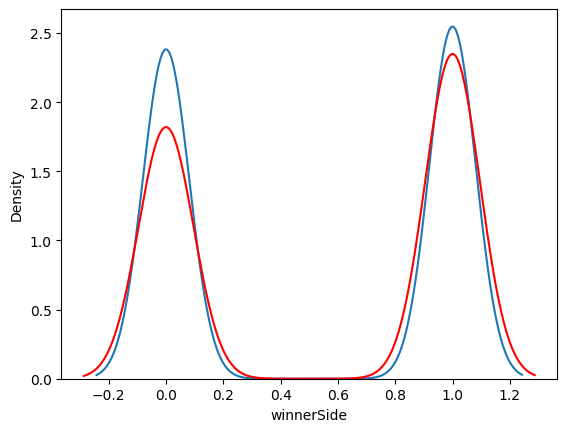

In [ ]:
cbc = CatBoostClassifier(
    random_state = 42,
    bootstrap_type = "MVS",
    max_depth = 4,
    subsample = 1,
    iterations =2500,
    min_data_in_leaf = 1,
    task_type="CPU"
).fit(X_w_cat, y_w_cat, cat_features=cat_features, logging_level='Silent')


pred_cbc = cbc.predict(X_test_w_cat)
print(pred_cbc)
submission = pd.read_csv('SampleSubmission.csv')
submission['winnerSide'] = pred_cbc # ваше предсказание
submission.to_csv('submission_CatBoost_av.csv', index=False)
print(submission)

sns.kdeplot(y)
sns.kdeplot(pred_cbc, color="r")

стакаем катбусты


In [ ]:
cbc = CatBoostClassifier(
    iterations=12000,
    learning_rate=0.05,
    depth=5,
    loss_function="Logloss",
    eval_metric="Accuracy",
    random_seed=42,
    verbose=100,
    cat_features=cat_features
)
cbc2 = CatBoostClassifier(
    iterations=12000,
    learning_rate=0.05,
    depth=5,
    loss_function="Logloss",
    eval_metric="Accuracy",
    random_seed=42,
    verbose=100,
)

estimators = [
    ('CatBoost', cbc)
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=cbc2
).fit(X_w_cat, y_w_cat)

0:	learn: 0.6404045	total: 73.3ms	remaining: 14m 38s
100:	learn: 0.6700745	total: 1.8s	remaining: 3m 32s
200:	learn: 0.6871875	total: 3.15s	remaining: 3m 4s
300:	learn: 0.7004112	total: 4.52s	remaining: 2m 55s
400:	learn: 0.7227470	total: 6.83s	remaining: 3m 17s
500:	learn: 0.7364152	total: 9.31s	remaining: 3m 33s
600:	learn: 0.7489721	total: 10.7s	remaining: 3m 23s
700:	learn: 0.7614179	total: 12.2s	remaining: 3m 16s
800:	learn: 0.7754195	total: 13.6s	remaining: 3m 10s
900:	learn: 0.7841982	total: 15.1s	remaining: 3m 5s
1000:	learn: 0.8023114	total: 16.6s	remaining: 3m 2s
1100:	learn: 0.8149794	total: 18s	remaining: 2m 58s
1200:	learn: 0.8264252	total: 20.1s	remaining: 3m
1300:	learn: 0.8330926	total: 23s	remaining: 3m 8s
1400:	learn: 0.8426492	total: 24.5s	remaining: 3m 5s
1500:	learn: 0.8480942	total: 26s	remaining: 3m 1s
1600:	learn: 0.8535393	total: 27.5s	remaining: 2m 58s
1700:	learn: 0.8584287	total: 29s	remaining: 2m 55s
1800:	learn: 0.8627625	total: 30.6s	remaining: 2m 53s
190

[1 0 0 ... 1 1 0]
      winnerSide
0              1
1              0
2              0
3              1
4              0
...          ...
3745           1
3746           0
3747           1
3748           1
3749           0

[3750 rows x 1 columns]


<Axes: xlabel='winnerSide', ylabel='Density'>

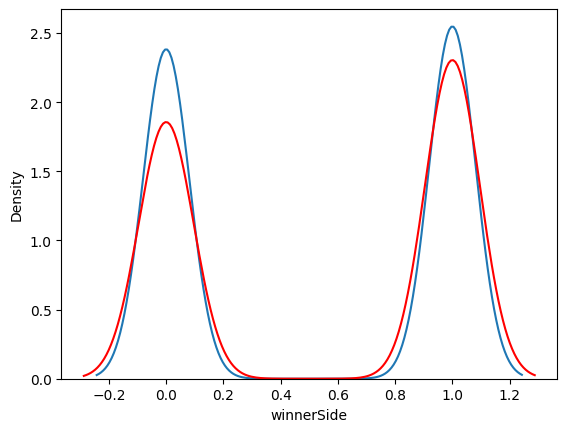

In [ ]:
pred_cbc = clf.predict(X_test_w_cat)
print(pred_cbc)
submission = pd.read_csv('SampleSubmission.csv')
submission['winnerSide'] = pred_cbc # ваше предсказание
submission.to_csv('submission_CatBoost_av.csv', index=False)
print(submission)

sns.kdeplot(y)
sns.kdeplot(pred_cbc, color="r")